In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025-2026 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation Datasets*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v5) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation
Datasets* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Building the temporal graph $O-(RV/RL)-O$](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ graph](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2026/01/31, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under local_utils directory, but they are not in their final form and should be considered an alpha release.

The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main graph (2+ billions of nodes, $\sim4$ billions of edges), and two derived graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   

DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



---

# 8 Tail Analysis of Degree Distribution

## a) Method Proposed by Clauset et al. (2009)

We briefly present the method used in this analysis, originally introduced by  A. Clauset, C.R. Shalizi, and M.E.J. Newman in  *"Power-law distributions in empirical data"*, *SIAM Review*, 51(4), 661–703 (2009).  ([arXiv:0706.1062](https://arxiv.org/abs/0706.1062), [DOI: 10.1137/070710111](https://doi.org/10.1137/070710111))

Multiple implementations of this method are available and referenced at the following link:  [https://aaronclauset.github.io/powerlaws/](https://aaronclauset.github.io/powerlaws/)

We will first recall the main steps of the method and illustrate it with a simple example.

As a starting point, we display the probability distribution function (PDF) and the complementary cumulative distribution function (CCDF) of the marginal in-degree distribution for $RV$ nodes—i.e., considering only edges of the type $RV{\to}RV$.


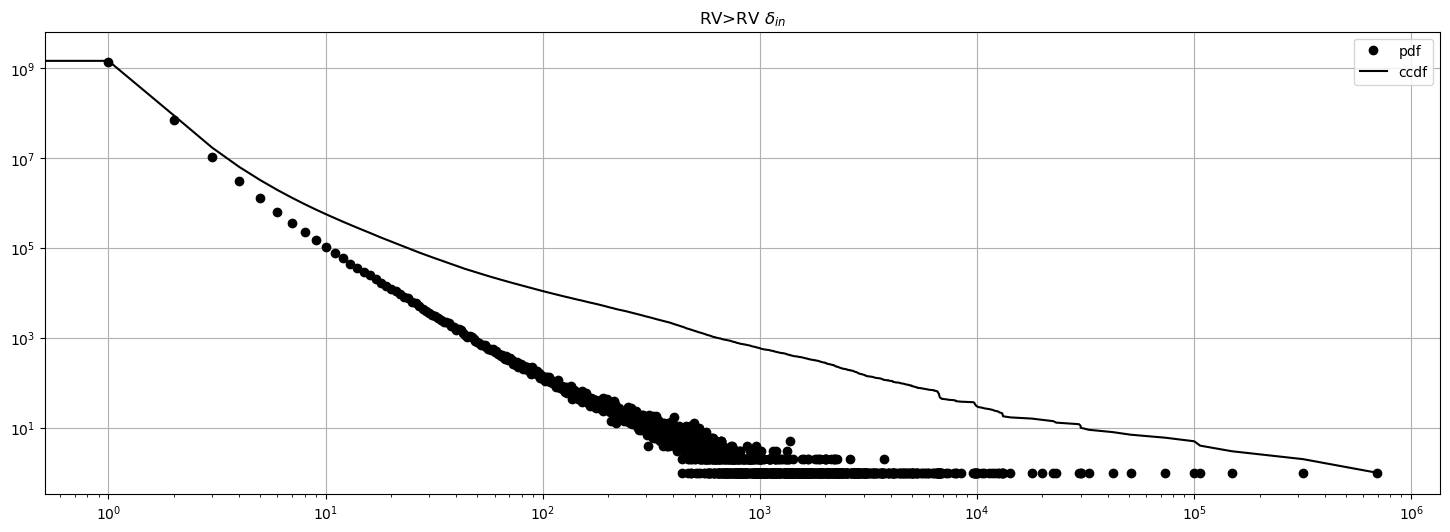

In [3]:
FTrueTime=True
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))

# basic plot
Year=2019
plt.figure(figsize=(18,6))
plt.title(r'RV>RV $\delta_{in}$')
plt.plot(din["RV>RV"][Year]["x"],din["RV>RV"][Year]["y"],"ok",label=r'pdf')
plt.plot(din["RV>RV"][Year]["x"],din["RV>RV"][Year]["ccdf"],"k",label=r'ccdf')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

The study of minimal models shows that, in some cases, the in-degree distribution  
tends to follow a power-law behavior for large degree values $\delta_{in}$.

Following the methodology proposed by Clauset et al., one can estimate the most likely exponent $\hat{\alpha}$ (or $\hat{e}$ in this paper) using maximum likelihood estimation (MLE) for all candidate cutoff values $x_c$, under the assumption that the distribution follows a parametric form:

$$
\text{pdf}(x) \propto x^{-\alpha}, \quad \text{for } x \geq x_c.
$$

Among these candidate cutoffs, the optimal threshold $x_c^{min}$ is defined as the value for which the empirical distribution is closest to the theoretical power-law distribution fitted with exponent $\hat{\alpha}(x_c)$.  
This closeness is typically measured using the Kolmogorov–Smirnov (KS) distance, though alternative distance metrics may also be considered (see discussion below).

The scaling exponent estimated for the best cutoff, $\hat{\alpha}(x_c^{min})$, is then used to characterize the tail behavior of the distribution for $x \geq x_c^{min}$.

Two important considerations must be kept in mind:
- The method assumes from the outset that the distribution follows a power-law in its tail.
- The approach must be adapted depending on whether the data are discrete (as in the case of degree distributions) or continuous, as this affects both the MLE formula and the goodness-of-fit evaluation.


We will focus on certain aspects of the method, specifically steps 1 and 2.

For $x \ge x_c$, we define
$$\text{pdf}(x) = \frac{x^{-\alpha}}{\zeta(\alpha, x_c)},$$
where
$$\zeta(\alpha, x_c) = \sum_{x=x_c}^{+\infty} x^{-\alpha}.$$

The complementary cumulative distribution function is given by
$$\text{ccdf}(x) = \frac{\zeta(\alpha, x)}{\zeta(\alpha, x_c)}.$$

For a given subdataset  $\{x_i| x_i\ge x_c\}$, we can calculate the estimator of the parameter $\alpha$ which maximize the $\log$ of the Likelihood function

$$\text{LL}(\alpha,x_c)=\sum_i\log\frac{x_i^{-\alpha}}{\zeta(\alpha, x_c)}$$

$$\text{LL}(\alpha,x_c)=-N\log\zeta(\alpha, x_c)-\alpha\sum_i\log x_i$$


- If $x_c\ge 100$, we used an approximation to calculate $\hat{\alpha}$ , valid for $x_c\gtrsim 6$ (See Clauset et al.):
$$\hat{\alpha} \sim 1 + N \left[ \sum_{i=0}^{N-1} \log\left(\frac{x_i}{x_c - 0.5}\right) \right]^{-1},$$
where $x_i$ are the degree values of the $N$ nodes whose degree is greater than or 
equal to $x_c$.

If, as in this case, we instead have the histogram of values, i.e., the number of 
occurrences $y_j$ for the value $x_j$, then $N = \sum_j y_j$, the previous expression becomes
$$\hat{\alpha} \sim 1 + N \left[ \sum_{j} y_j \log\left(\frac{x_j}{x_c - 0.5}\right) \right]^{-1}.$$

And the maximum of the log-likelihood is such that
$$\frac{\zeta'\left(\hat{\alpha},x_c\right)}{\zeta\left(\hat{\alpha},x_c\right)}=-\frac{\sum_{i|x_i\ge x_c}y_i\log(x_i)}{\sum_{i|x_i\ge x_c}y_i}$$

- For $x_c<100$, we used an explicit optimization of $LL(\alpha,x_c)$, using the previous estimate as the starting value.

Instead of $KS$ one may use the weighted $KS$ distance (see discussion in Clauset et al 2009):

$$KS=\max_{x_i\ge x_c}|P(x)-S(x)|$$

$$KS_w=\max_{x_i\ge x_c}{|P(x)-S(x)|\over\sqrt{P(x)(1-P(x))}}$$

where 
- $P(x)$ is the `ccdf` function defined above for $x_c$ and $\alpha=\hat\alpha(x_c)$, and 
- $S(x)$ the complementary cumulative distribution function of the observed data for $\{x_i| x_i\ge x_c\}$
$S(x)=1-\sum_{i|x_i\ge x}{y_i/N}$ where $N=\sum_{i|x_i\ge x_c}{y_i}$.

As will be discussed in the following sections, it may be appropriate to impose a lower bound on $x_c$, due to the potential presence of numerous outliers in some of these distributions.


We can then display three different figures, all sharing the same x-axis:

- The two previously shown distributions (`pdf` black circles and `ccdf` black line), along with the best-fit tail estimation (red) assuming a power-law behavior with exponent $\hat{\alpha}(x_c^{min})$,  normalized to intersect the `ccdf` at $x_c = x_c^{min}$ (marked by a blue vertical line).
- The Kolmogorov–Smirnov distance $KS(x_c)$ (or any other relevant distance metric) as a function of the cutoff $x_c$.
- The estimated power-law exponent $\hat{\alpha}(x_c)$ as a function of $x_c$.


x_c^min 66
alpha(x_c^min) 2.250524760405358
D_max(x_c^min) 0.029151685333823587


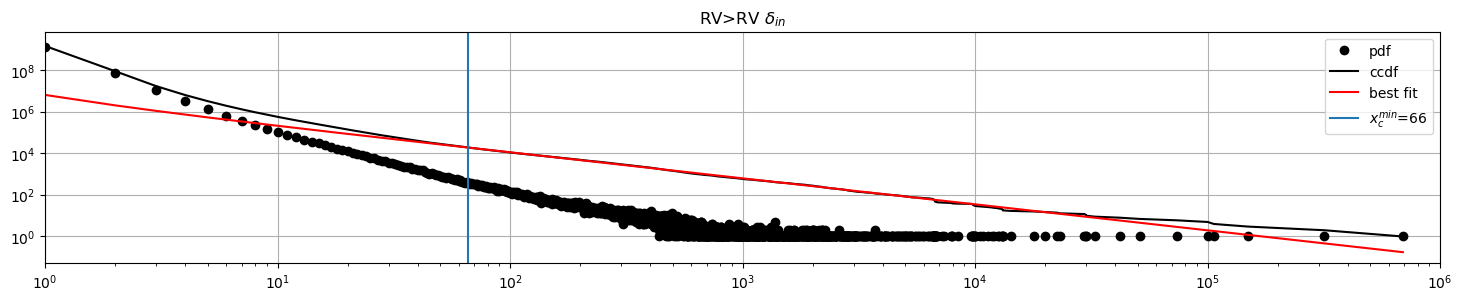

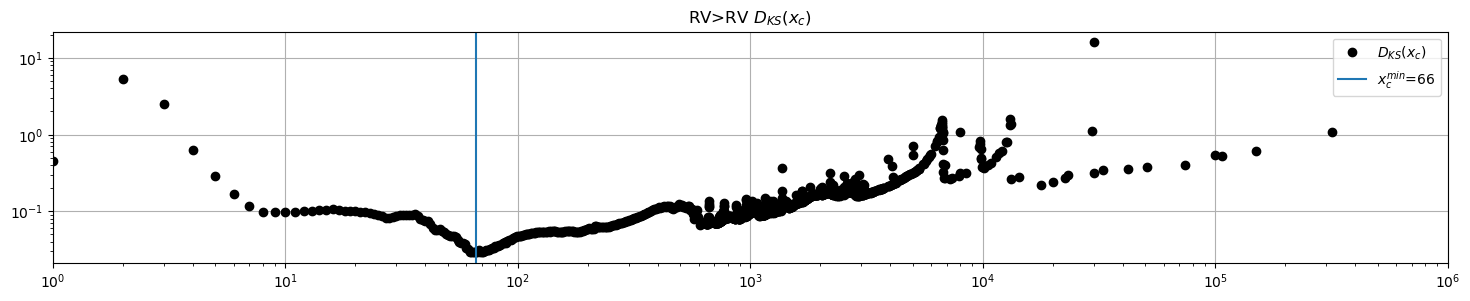

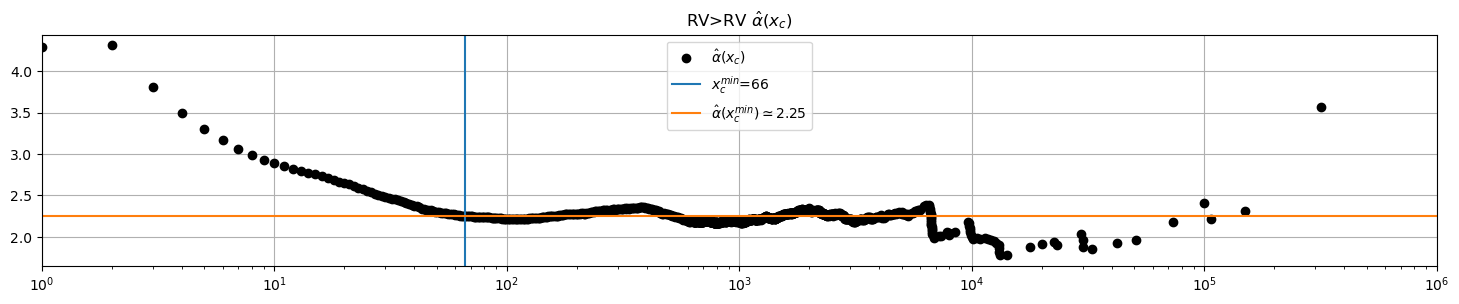

In [4]:
Year=2019
WKS="weightedKS" # weightedKS, KS, Kuiper
figsize=(18,3)

x=din["RV>RV"][Year]["x"]
y=din["RV>RV"][Year]["y"]
ccdf=din["RV>RV"][Year]["ccdf"]
yfit,xfit,imin,x_min_shift,e_x_min_shift,D_max_shift=Get_yfit_yc_y_x(x,y,ccdf,Fall=True,Verbose=False,WKS=WKS)

print("x_c^min",x_min_shift[imin])
print("alpha(x_c^min)",e_x_min_shift[imin])
print("D_max(x_c^min)",D_max_shift[imin])

plt.figure(figsize=figsize)
plt.title(r'RV>RV $\delta_{in}$')
plt.plot(din["RV>RV"][Year]["x"],din["RV>RV"][Year]["y"],"ok",label=r'pdf')
plt.plot(din["RV>RV"][Year]["x"],din["RV>RV"][Year]["ccdf"],"k",label=r'ccdf')
plt.plot(xfit,yfit,"r",label=r'best fit')
plt.axvline(x=x_min_shift[imin],label=r'$x_c^{min}$='+str(x_min_shift[imin]))
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlim(1,1e6)
plt.show()

plt.figure(figsize=figsize)
plt.title(r'RV>RV $D_{KS}(x_c)$')
plt.plot(x_min_shift,D_max_shift,"ok",label=r'$D_{KS}(x_c)$')
plt.axvline(x=x_min_shift[imin],label=r'$x_c^{min}$='+str(x_min_shift[imin]))
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend()
#plt.ylim(1e-2,1)
plt.xlim(1,1e6)
plt.show()

plt.figure(figsize=figsize)
plt.title(r'RV>RV $\hat{\alpha}(x_c)$')
plt.plot(x_min_shift,e_x_min_shift,"ok",label=r'$\hat{\alpha}(x_c)$')
plt.axvline(x=x_min_shift[imin],label=r'$x_c^{min}$='+str(x_min_shift[imin]))
plt.axhline(y=e_x_min_shift[imin],color="tab:orange",label=r'$\hat{\alpha}(x_c^{min})\simeq$'+str(np.round(e_x_min_shift[imin],2)))
plt.grid()
plt.xscale('log')
plt.legend()
plt.xlim(1,1e6)
#plt.ylim(1,6)
plt.show()



Although $\hat{\alpha}(x_c)$ is computed independently of the distance function used, the selection of the optimal cutoff $x_c^{min}$ relies on it. This dependency can introduce sensitivity in the presence of sparse data, outliers, or transient regimes, potentially resulting in multiple local minima (see discussion below).

## b) In the scope of this study

We will use a more compact and modular plotting function, designed to easily generate this figure for different years and distance functions.

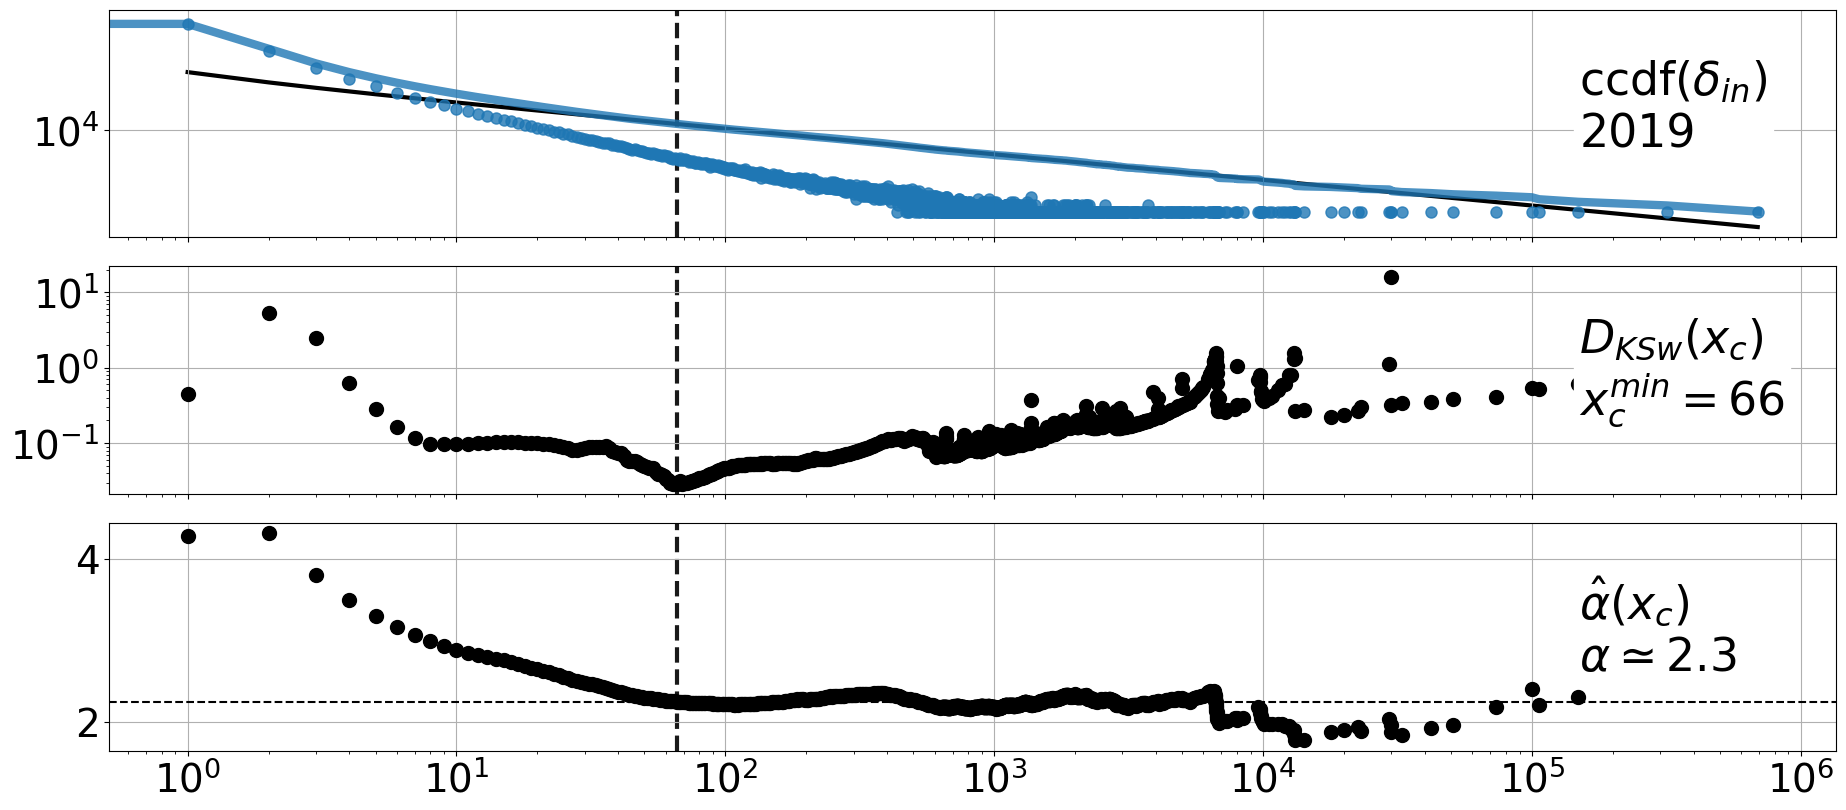

In [5]:
FTrueTime=True
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))

year=2019
WKS="weightedKS" # # weightedKS, KS, or Kuiper
x=din["RV>RV"][year]["x"]
y=din["RV>RV"][year]["y"]
ccdf=din["RV>RV"][year]["ccdf"]
Plot_Figure_Degree(x,y,ccdf,year=year,height=4,WKS=WKS)



A detailed analysis of these figures is beyond the scope of this study but will be partially addressed later, particularly with regard to the influence of outliers.

In any case, the method proposed by Clauset et al. should not be treated as a "black box" for estimating the scaling exponent without carefully examining, for instance:
- the conditions under which the pure power-law hypothesis is appropriate (e.g., in relation to the underlying network growth mechanisms);
- the stability of the estimated exponent $\hat{\alpha}(x_c)$ across a range of values $x_c \geq x_c^{min}$ (as discussed for synthetic data in Clauset et al.), and its sensitivity to the choice of distance function;
- the temporal evolution of the estimated exponent.

We will now explore some of these aspects.


## c) KS vs weighted KS vs $X_C^{min}$ 

Here, we assess the influence of the WKS parameter by replacing the weighted Kolmogorov–Smirnov distance with its unweighted counterpart.

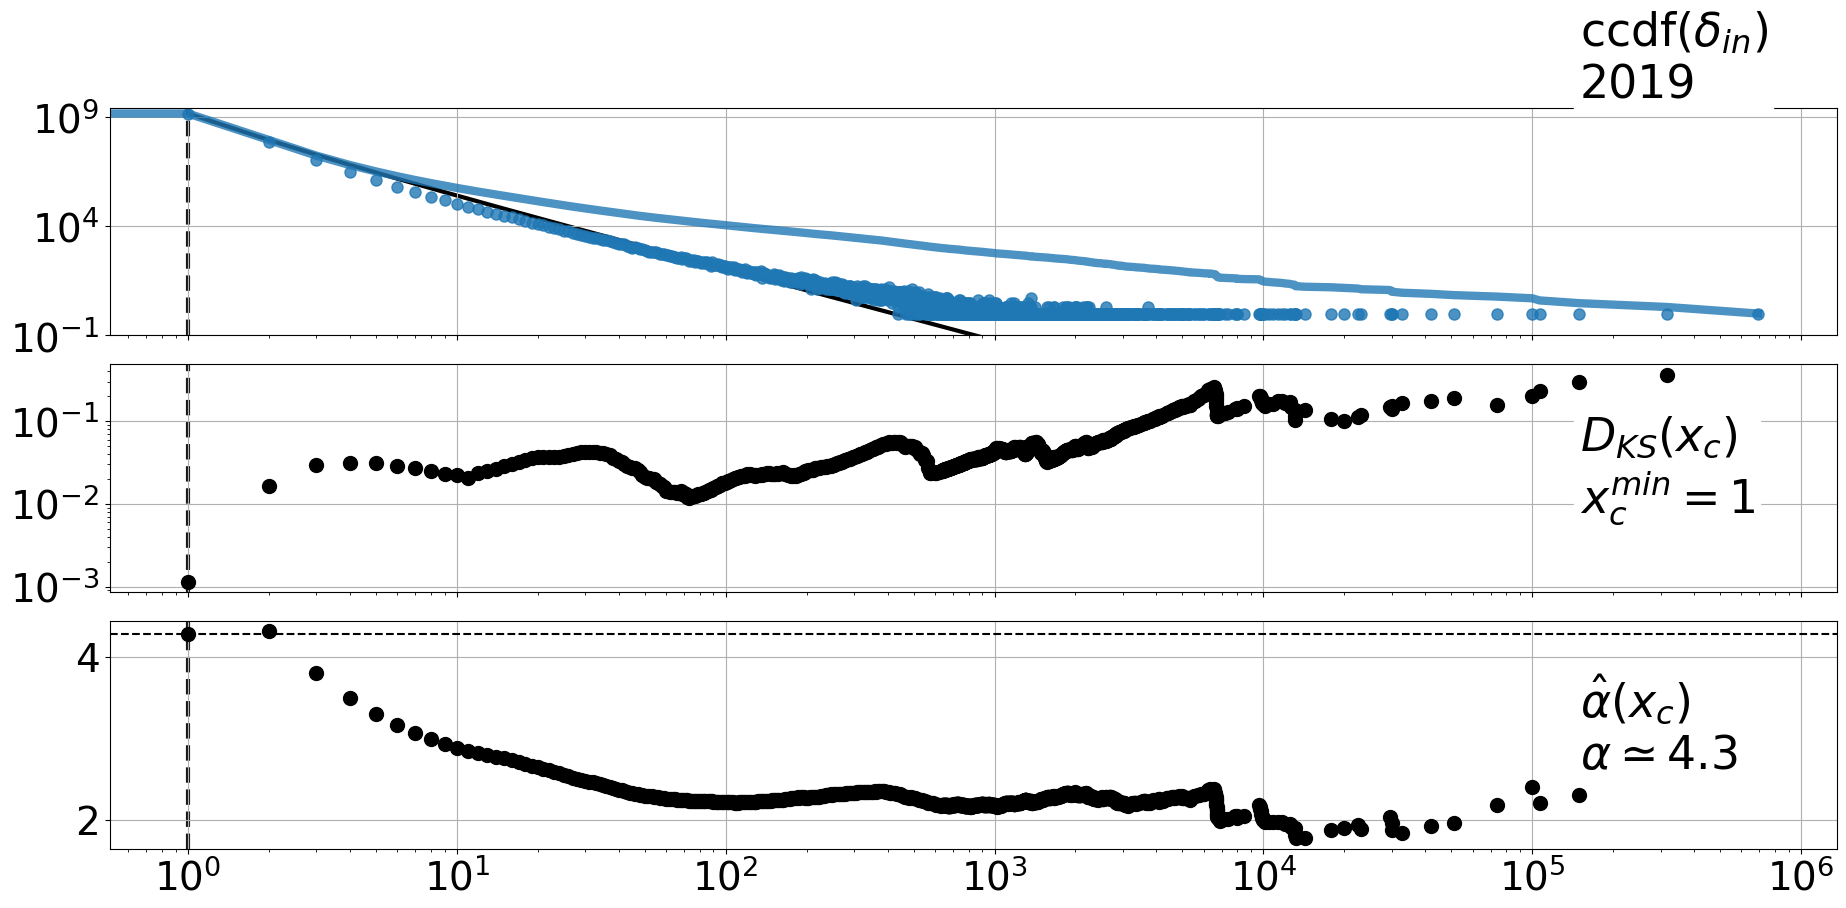

In [6]:
FTrueTime=True
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))

year=2019
WKS="KS" # KS

x=din["RV>RV"][year]["x"]
y=din["RV>RV"][year]["y"]

ccdf=din["RV>RV"][year]["ccdf"]
Plot_Figure_Degree(x,y,ccdf,year=year,height=4,WKS=WKS,yrangeCCDF=[0.1,np.max(ccdf)*1.2])

From the figure showing the distance as a function of the cutoff value $x_c$ (middle), we observe that the global minimum is now located at $x_c=1$. Additionally, several local minima are present.

For instance, these local minima may arise from finite-size effects or may be related to the presence of outliers (see discussion below).

The behavior observed at very small values of $x_c$ is strongly influenced by the characteristics of the estimation method and the inherently discrete nature of degree distributions. It requires careful interpretation, particularly in the presence of transient regimes.

Here, we present the result of applying the method to a purely discrete power-law distribution (i.e., a Zipf distribution).


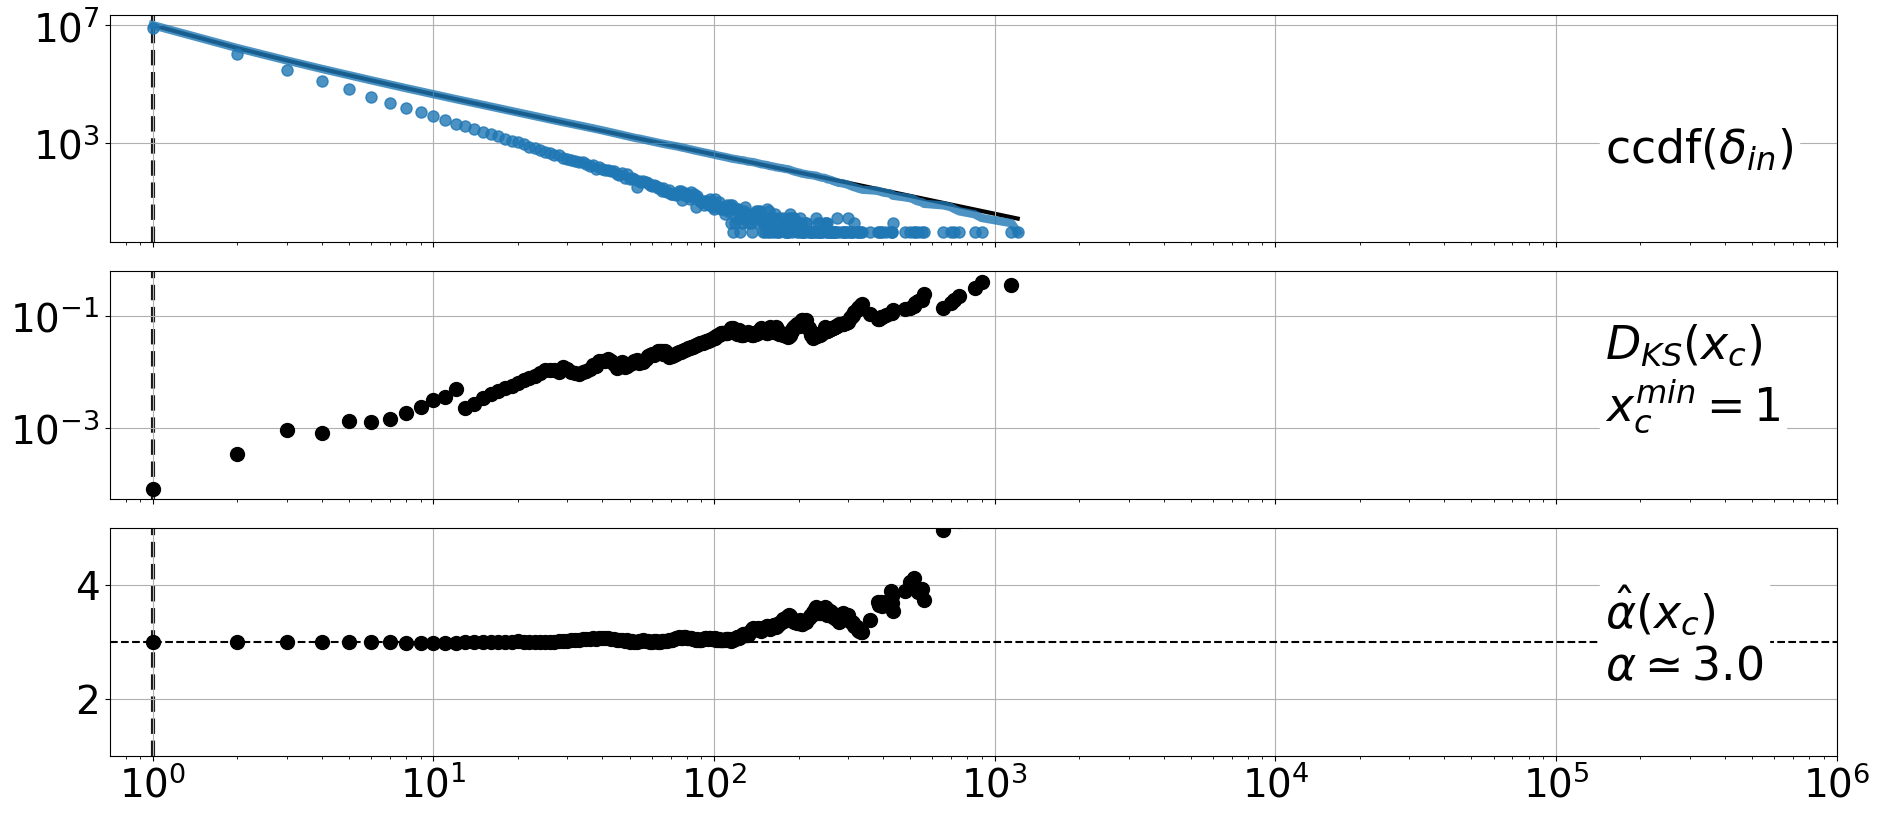

In [7]:
alpha=3
xmin=1
N=int(1e7)

x,y,ccdf=zipf_distribution(alpha,xmin,N,Fccdf=True)
Plot_Figure_Degree(x,y,ccdf,yrangeAlpha=[1,5],height=4,WKS="KS")

As expected, the optimal cutoff value for the tail of the distribution—beyond which a power-law behavior can be reasonably assumed—is found to be $x_c = 1$.

In this next case, we present the results obtained by applying the method to a discrete distribution constructed as the sum of two pure discrete power-law distributions, each characterized by a different scaling exponent.


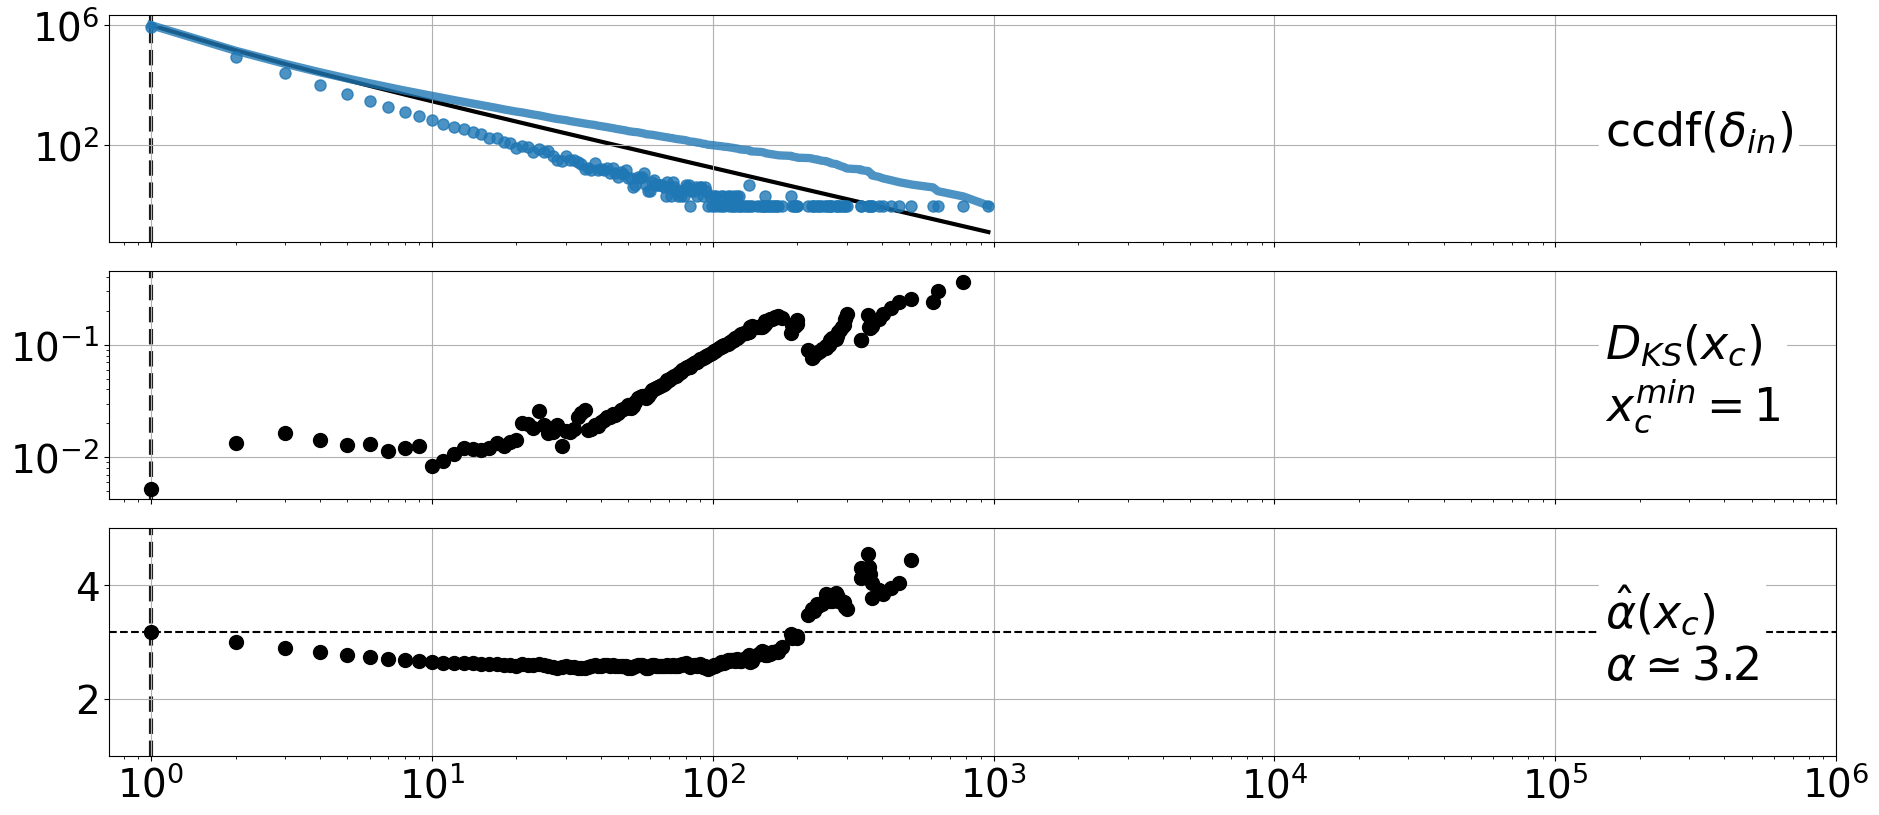

In [21]:
alpha_1=3.5;N_1=int(0.8e6)
alpha_2=2.5;N_2=int(0.2e6)
xmin_1=1;xmin_2=1

x,y,ccdf=Sum_Two_Zipf_distribution(alpha_1,xmin_1,N_1,alpha_2,xmin_2,N_2,Fccdf=True)
Plot_Figure_Degree(x,y,ccdf,yrangeAlpha=[1,5],height=4,WKS="KS")


The second regime, which dominates at large degree values, is not detected by the method, and the scaling exponent associated with the first regime is underestimated.

Increasing the sample size or adjusting the relative weight between the two component distributions leads to the expected estimation behavior in the high-degree regime.


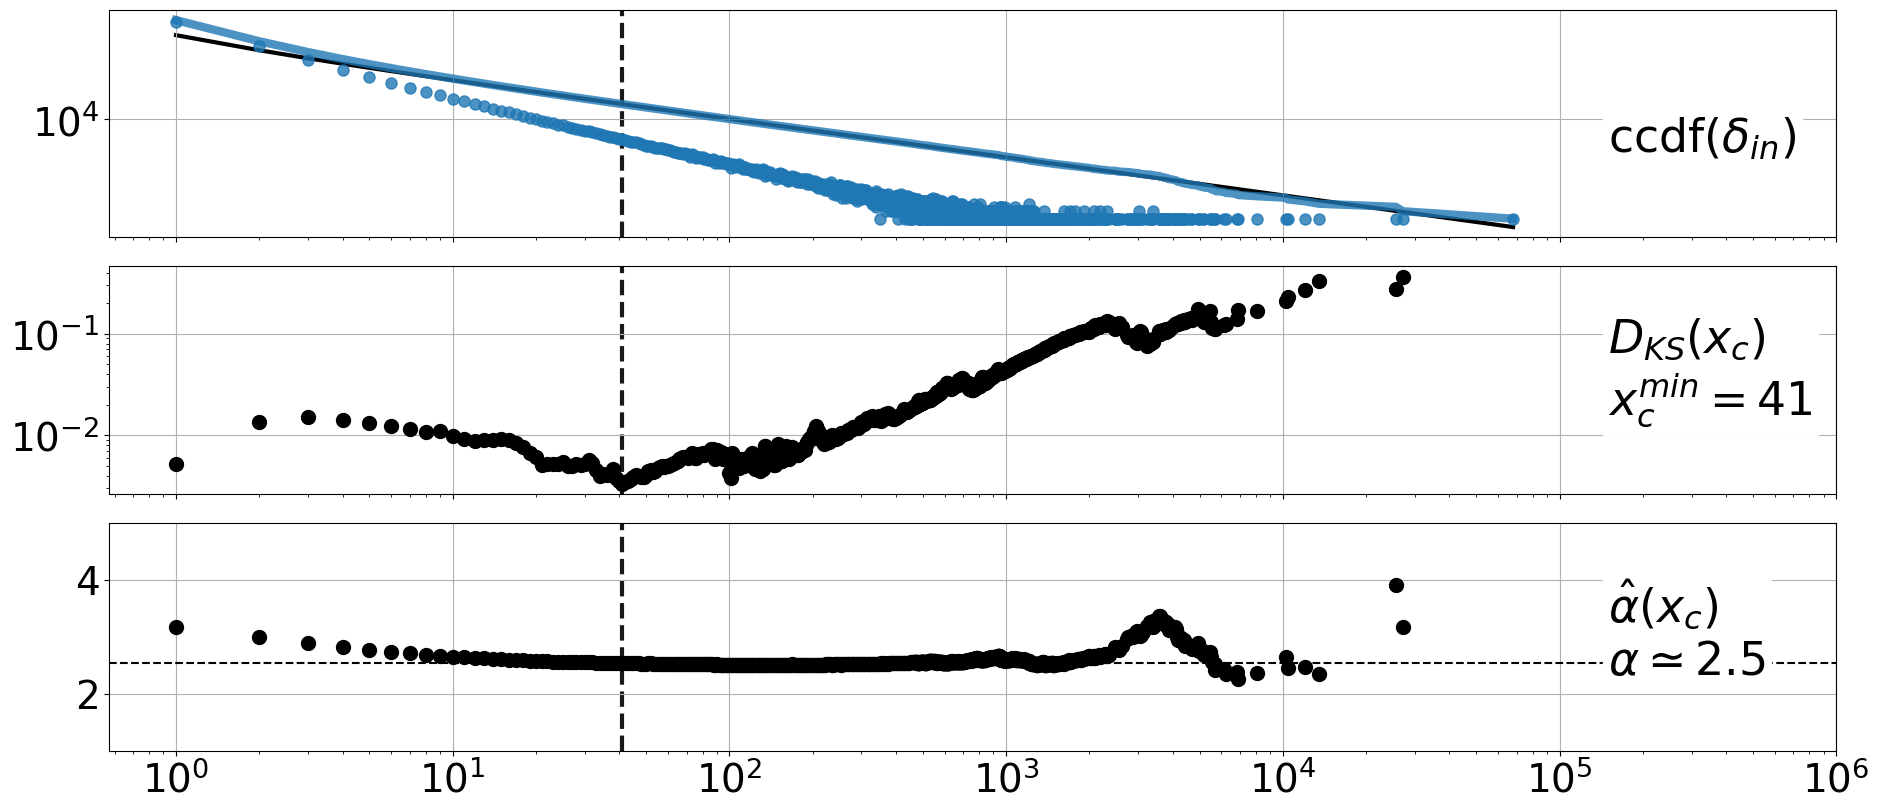

In [22]:
# increasing the size of the sample (1e8 instead of 1e7)
alpha_1=3.5;N_1=int(0.8e8)
alpha_2=2.5;N_2=int(0.2e8)
xmin_1=1;xmin_2=1

x,y,ccdf=Sum_Two_Zipf_distribution(alpha_1,xmin_1,N_1,alpha_2,xmin_2,N_2,Fccdf=True)
Plot_Figure_Degree(x,y,ccdf,yrangeAlpha=[1,5],height=4,WKS="KS")

Using by default the weighted version of the Kolmogorov–Smirnov distance effectively emphasizes the tail of the distribution while downweighting the contribution of its lower end.

In the present analysis, we also introduce the possibility of imposing a minimal cutoff value, $x_c^{min}$.

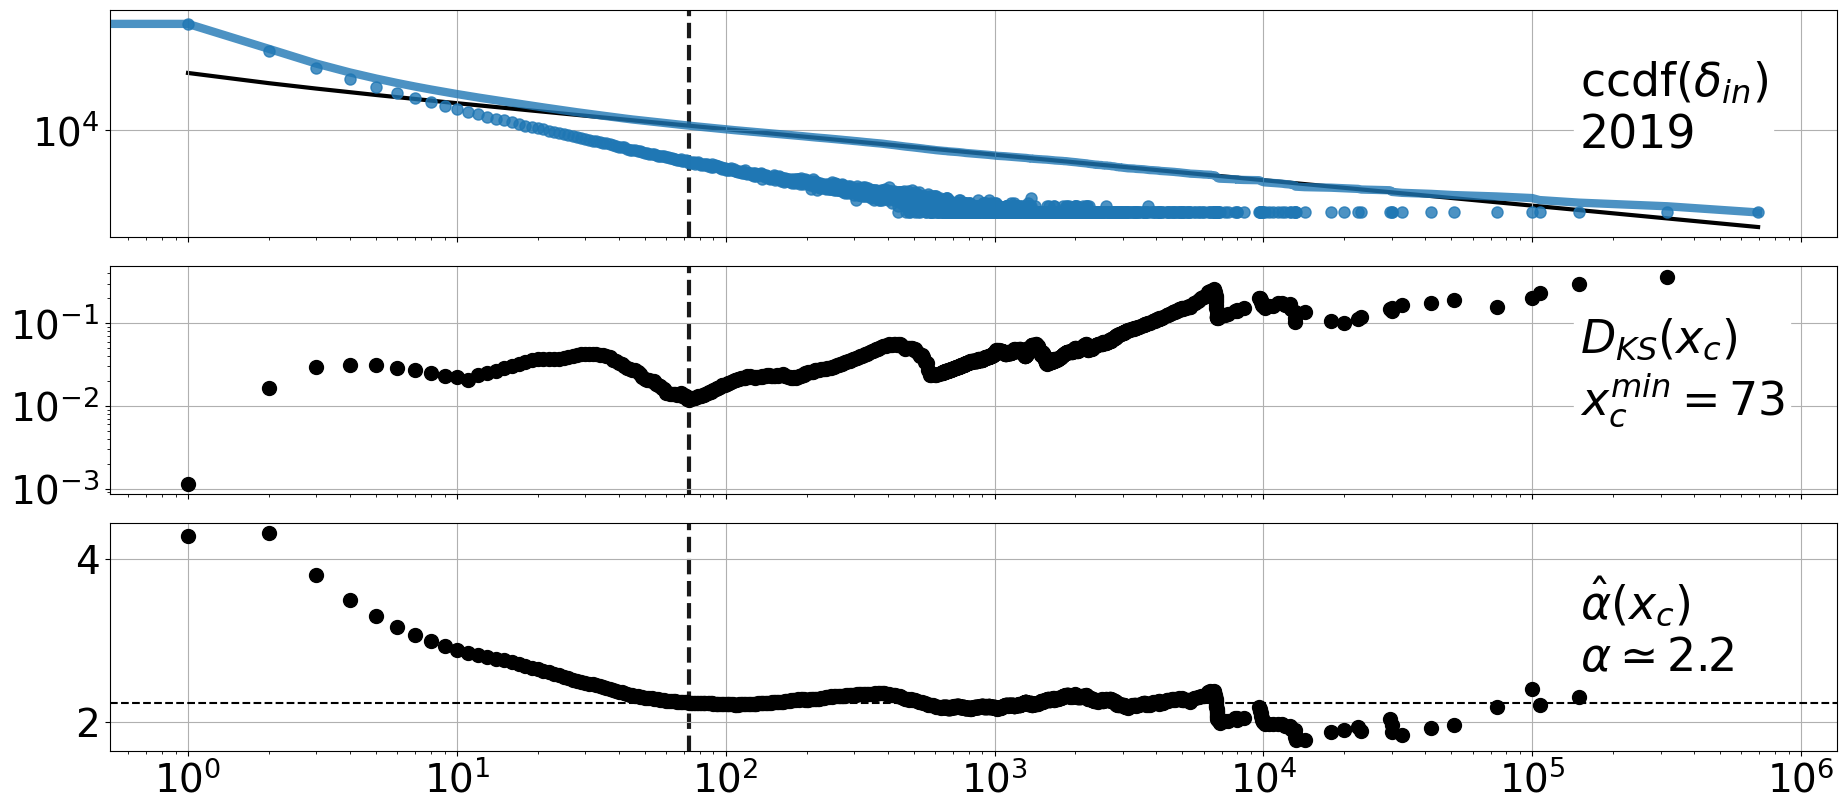

In [23]:
FTrueTime=True
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))

year=2019
WKS="KS" # KS
XCmin=6

x=din["RV>RV"][year]["x"]
y=din["RV>RV"][year]["y"]
ccdf=din["RV>RV"][year]["ccdf"]
Plot_Figure_Degree(x,y,ccdf,year=year,height=4,WKS=WKS,XCmin=XCmin)

In the figure above, the global minimum at $x_c = 1$ (according to the KS distance) is excluded from consideration, as it lies below the predefined threshold set by the `XCmin` parameter.


## d) Scaling Factor Over Time

To compute the in-degree and out-degree histograms at a given time, it is essential to:

- Consider only the nodes and edges that exist at that specific time point;  
- When edges do not have a timestamp (as in our case), decide whether to use the creation date of the source node, the target node, or whichever is later, depending on the system's characteristics;
- For directed graphs, where in-degree and out-degree are distinguished, clarify whether the topological direction (from source to target) is preserved or whether an alternative direction is defined, for example based on causal relationships (e.g., edges pointing from younger to older nodes).

In our approach, we chose to assign to each edge the **later** of the creation dates of its two incident nodes, which we interpret as the most plausible timestamp for the edge. Meanwhile, we preserve the original **topological direction** from source to target. This choice will be further discussed in the context of **cycle emergence** in the derived graph.


In [48]:
# building degree distributions over time.
FTrueTime=True

In [49]:
Fsave=False
Rebuild=False
version="20250524"

In [50]:
if Rebuild:
    # building histogram every month
    
    nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray()   
    Edgestype,Edgesencoding=GetEdgesTypesArray(nodes,edges,d)
    Nodestype,Nodesencoding=GetNodesTypesArray(nodes,edges,d)

    ti=time.time()
    sourceedges=GetSourceEdge(nodes,Nedges)
    sourceType=Nodestype[sourceedges]
    sourceTSM=timestampsarray2yearmonth(GetSourceEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Source Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    ti=time.time()
    targetType=Nodestype[edges]
    targetTSM=timestampsarray2yearmonth(GetTargetEdgeTimeStamp(nodes,edges,nodesad,d))
    tf=time.time()
    print("Target Type and TimesTamp Building elapse : ",np.round(tf-ti,2),"(s)")
    
    sourceTSM[:nodes[d["OindexMax"]+1]]=targetTSM[:nodes[d["OindexMax"]+1]]
    if FTrueTime:
        # true time for edges
        TSM=np.maximum(sourceTSM,targetTSM)
    else:
        TSM=sourceTSM
    del sourceTSM,targetTSM
#Source Type and TimesTamp Building elapse :  66.72 (s)
#Target Type and TimesTamp Building elapse :  87.09 (s)

In [51]:
if Rebuild:
    dout={}
    din={}
    # permute edges to swith to TT
    # can update timestamp and/or source/target
    # here only TT (no permutation of source and target)
    GetPerTypesDegreeStats(sourceedges,edges,None,Edgestype,Edgesencoding,dout,din,Nnodes,PerFlag="EDGE",FlagMonth=True,TSM=TSM)   
    if Fsave:
        if FTrueTime:
            pickle.dump((dout,din),open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_"+version+".pkl","wb"))
        else:
            pickle.dump((dout,din),open(exportpath+"degreeInOutHisto_Month_1980_2025_"+version+".pkl","wb"))
    #Per edges types elapse :  27464.4 (s

Now, applying steps 1 and 2 of Clause et al. at different time.

In [52]:
Rebuild=True
Fsave=True

WKS="weightedKS" # KS,weightedKS, Kuiper
XCmin=6  # default 0

In [53]:
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_"+version+".pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_Month_1980_2025_"+version+".pkl","rb"))

if Rebuild:
    print(dout.keys(),din.keys())
    xdate=[]
    x_min=[]
    e_x_min=[]
    D_max=[]
    Nnodes=[]
    Nedges=[]
    for year in range(1980,2022,1):
        print(year,end=" ")
        for month in range(0,12):
            try:
                x=din["RV>RV"][year*12+month]["x"]
                y=din["RV>RV"][year*12+month]["y"]
                yc=din["RV>RV"][year*12+month]["ccdf"]
                yfit,xfit,imin,x_min_shift,e_x_min_shift,D_max_shift=Get_yfit_yc_y_x(x,y,yc,Fall=True,WKS=WKS,XCmin=XCmin)
                xdate.append(year+(month-1)/12)
                x_min.append(x_min_shift[imin])
                e_x_min.append(e_x_min_shift[imin])
                D_max.append(D_max_shift[imin])
                Nnodes.append(y)
                Nedges.append(x*y)
            except:
                #print("missing",year,month)
                pass
    if Fsave:
        print("FTrueTime",FTrueTime)
        if FTrueTime:
            pickle.dump((xdate,x_min,e_x_min,D_max,Nnodes,Nedges),open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_"+version+"."+WKS+"_"+str(XCmin)+".ehat.pkl","wb"))
        else:
            pickle.dump((xdate,x_min,e_x_min,D_max,Nnodes,Nedges),open(exportpath+"degreeInOutHisto_Month_1980_2025_"+version+"."+WKS+"_"+str(XCmin)+".ehat.pkl","wb"))


dict_keys(['O>RL', 'O>RV', 'RL>RL', 'RL>RV', 'RV>RV']) dict_keys(['O>RL', 'O>RV', 'RL>RL', 'RL>RV', 'RV>RV'])
1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 FTrueTime True


We now present the main results as a function of time.

In [42]:
def ScalingFactorOverTime(WKS=WKS,XCmin=XCmin):
    def verticalline(fig,axs):
        alpha=0.5
        lw=3
        for year in range(2017,2021):
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        # dump date 
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        # Particular date 1/1/2013
        axs.axvline(x=2016+(7-1)/12,color='tab:orange',linestyle='-',alpha=1,lw=lw*2,label="7/2016")
        for year in [2009, 2011, 2014]:
            axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)
    nfig=3
    fontsize=28
    fig, axs = plt.subplots(nfig,figsize=(18,4*nfig),sharex=True)   
    plt.tight_layout()
    for i in range(nfig):
        axs[i].set_xlim(1990,2022)
        axs[i].grid()

    axs[0].scatter(xdate,e_x_min,s=30,zorder=10,label=r'$\hat{\alpha}(x_c^{min})$')
    axs[0].legend(loc='best',fontsize=fontsize+4,ncol=1,markerscale=3)
    #axs[0].set_yscale("log") 
    #axs[0].set_ylim(0.8,4.2)
    axs[0].tick_params(axis='both',which='major',labelsize=fontsize)
    verticalline(fig,axs[0])
    axs[0].axhline(y=2,color='k',linestyle='-',alpha=1,lw=2,label=r'$\hat{\alpha}(x_c^{min})=2$')
    axs[0].axhline(y=3,color='k',linestyle='-',alpha=1,lw=2,label=r'$\hat{\alpha}(x_c^{min})=3$')

    Dname={
        "KS":r'$D_{KS}(x_c)$',
        "weightedKS":r'$D_{KSw}(x_c)$',
        "Kuiper":r'$D_{KU}(x_c)$'
    }
    try:
        name=Dname[WKS]
    except:
        name="D_{unknown}"
        print("WARNING unknown distance in Plot_Figure_Degree")
    
    axs[1].scatter(xdate,D_max,s=30,zorder=10,label=name)
    axs[1].legend(loc='best',fontsize=fontsize+4,ncol=2,markerscale=3)
    #axs[1].set_yscale("log") 
    axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[1])

    axs[2].scatter(xdate,x_min,s=30,label=r'$x_c^{min}$')
    #axs[2].set_ylim(1,2e4) # attention un point à 0.5 à la date de dump exclu pour la lisibilité
    axs[2].set_yscale("log") 
    axs[2].tick_params(axis='both',which='major',labelsize=fontsize-2)
    verticalline(fig,axs[2])
    axs[2].legend(loc='best',fontsize=fontsize+4,ncol=1,markerscale=3)

    plt.show()

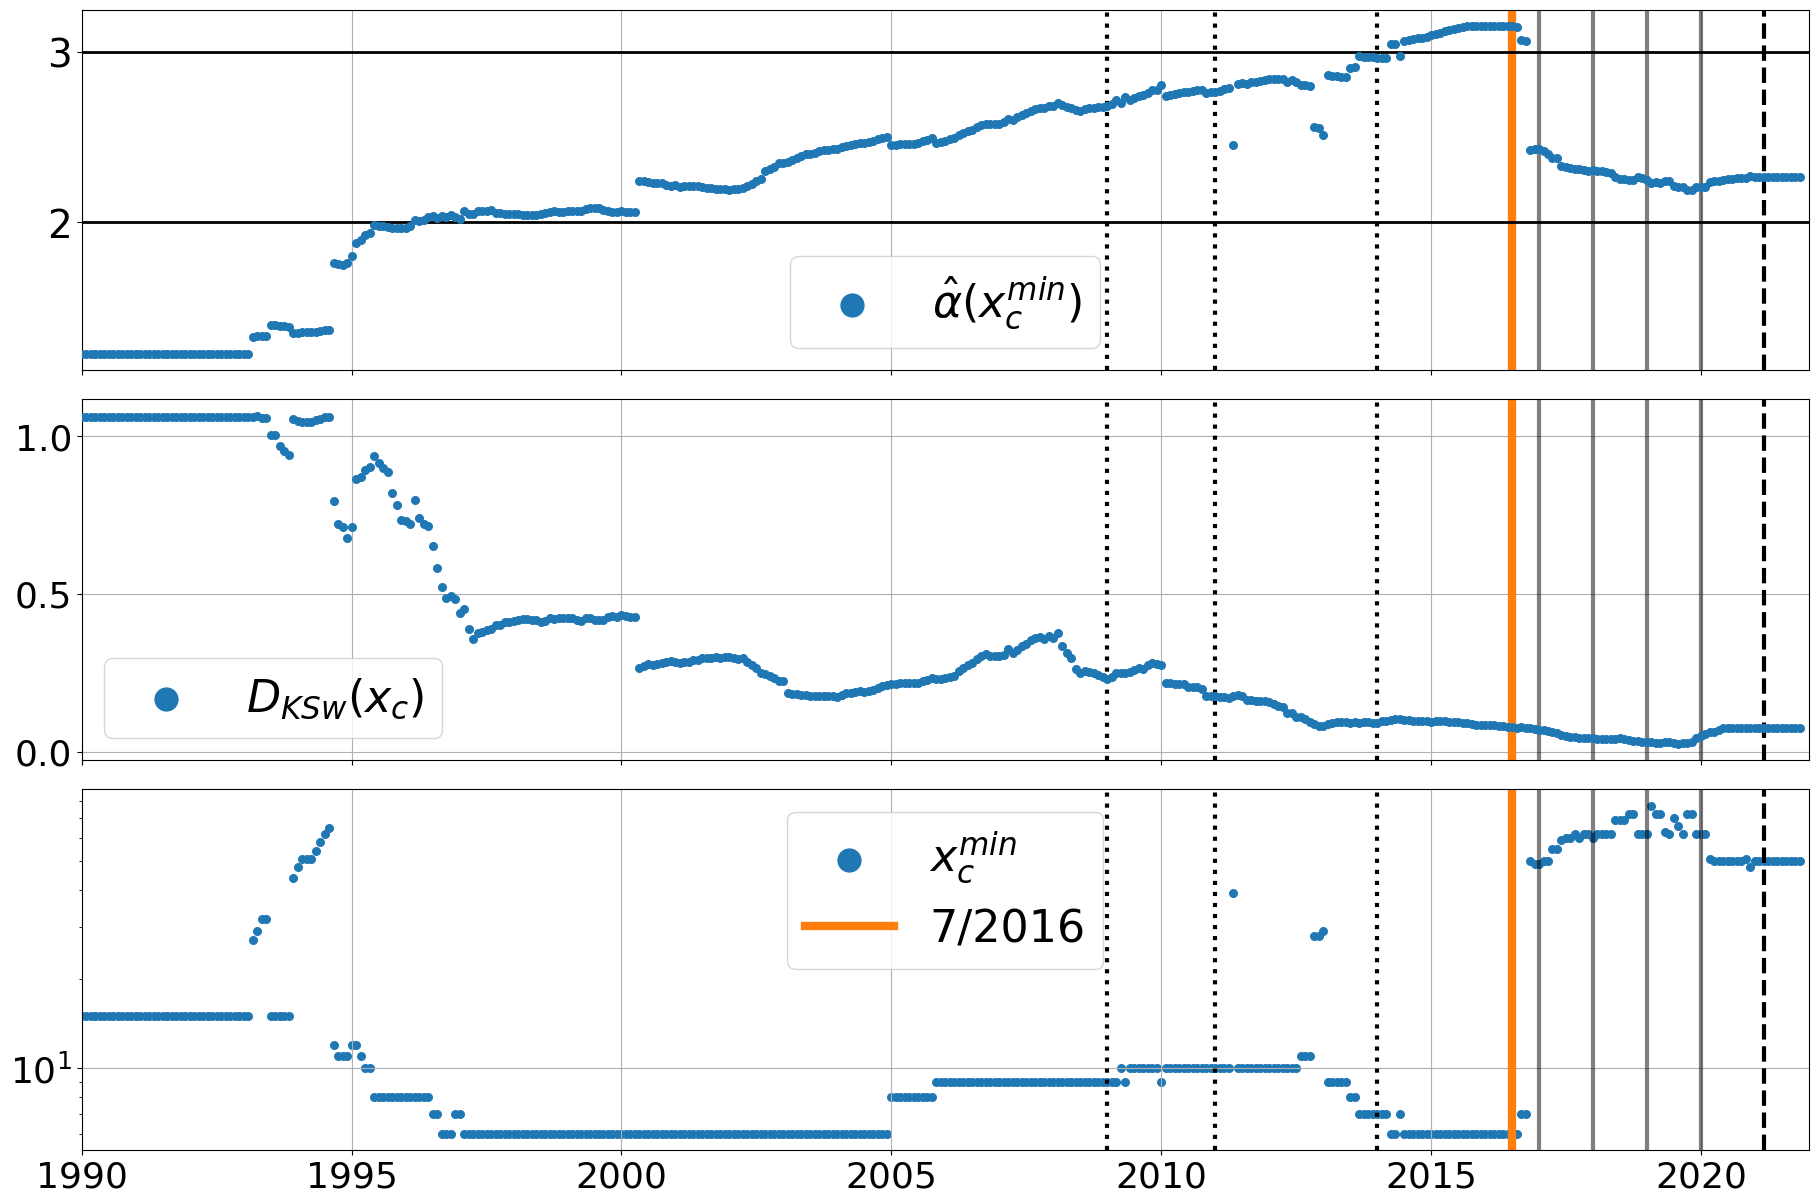

In [44]:
if FTrueTime:
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_"+version+"."+WKS+"_"+str(XCmin)+".ehat.pkl","rb"))
else:
    xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_Month_1980_2025_"+version+"."+WKS+"_"+str(XCmin)+".ehat.pkl","rb"))
    
ScalingFactorOverTime(WKS=WKS,XCmin=XCmin)

Again, the temporal evolution of these characteristics is not a "black box," but rather a 
way to discuss the emergence of scale-invariant properties while considering changes 
in evolution rules or potential threats to the validity of the method such as outliers, whose 
influence on the robustness of the method proposed by Clauset et al. remains an open 
question.

As shown in the previous figure, a marked discontinuity appears around mid-2016 in the measured characteristics, following a period of nearly 20 years during which the measured exponent gradually increases from 2 to over 3.

To assess the sensitivity of the results to parameters such as the distance metric or the minimal cutoff value, we consider alternative configurations. Specifically, we reproduce the previous analysis using the unweighted Kolmogorov–Smirnov distance and without imposing any lower bound on $x_c^{min}$.

In [45]:
if False:
    for WKS,XCmin in [("KS",0),("KS",6),("Kuiper",0),("Kuiper",6),("weightedKS",0),("weightedKS",6)]:
        print("-"*80)
        print("WKS",WKS,"XCmin",XCmin)


        if FTrueTime:
            xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_TT_Month_1980_2025_20240924."+WKS+"_"+str(XCmin)+".ehat.pkl","rb"))
        else:
            xdate,x_min,e_x_min,D_max,Nnodes,Nedges=pickle.load(open(exportpath+"degreeInOutHisto_Month_1980_2025_20240924."+WKS+"_"+str(XCmin)+".ehat.pkl","rb"))

        ScalingFactorOverTime(WKS=WKS,XCmin=XCmin) 

We now focus on analyzing the behavior in the vicinity of the mid-2016 discontinuity to discuss the influence of outliers on the method.

## e) Influence of outliers on the method proposed by Clauset et al.

In the previous representations of the temporal evolution of the in-degree distributions for the graph limited to $RV$ nodes (and $RV>RV$ edges), it is evident that the method for characterizing the properties of in-degree distributions shows signs of instability, with a significant discontinuity in Jully 2016 visible ($WKS="weightedKS"$, $X_c^{min}\ge 6$) in the measures of $\hat{\alpha}(x_c^{min})$ and $x_c^{min}$.

We can observe in details what happens around this discontinuity.

In [46]:
yearlist= [2013,2016,2017,2019]

### In- and out-degree distribution around mid-2016 discontinuity.

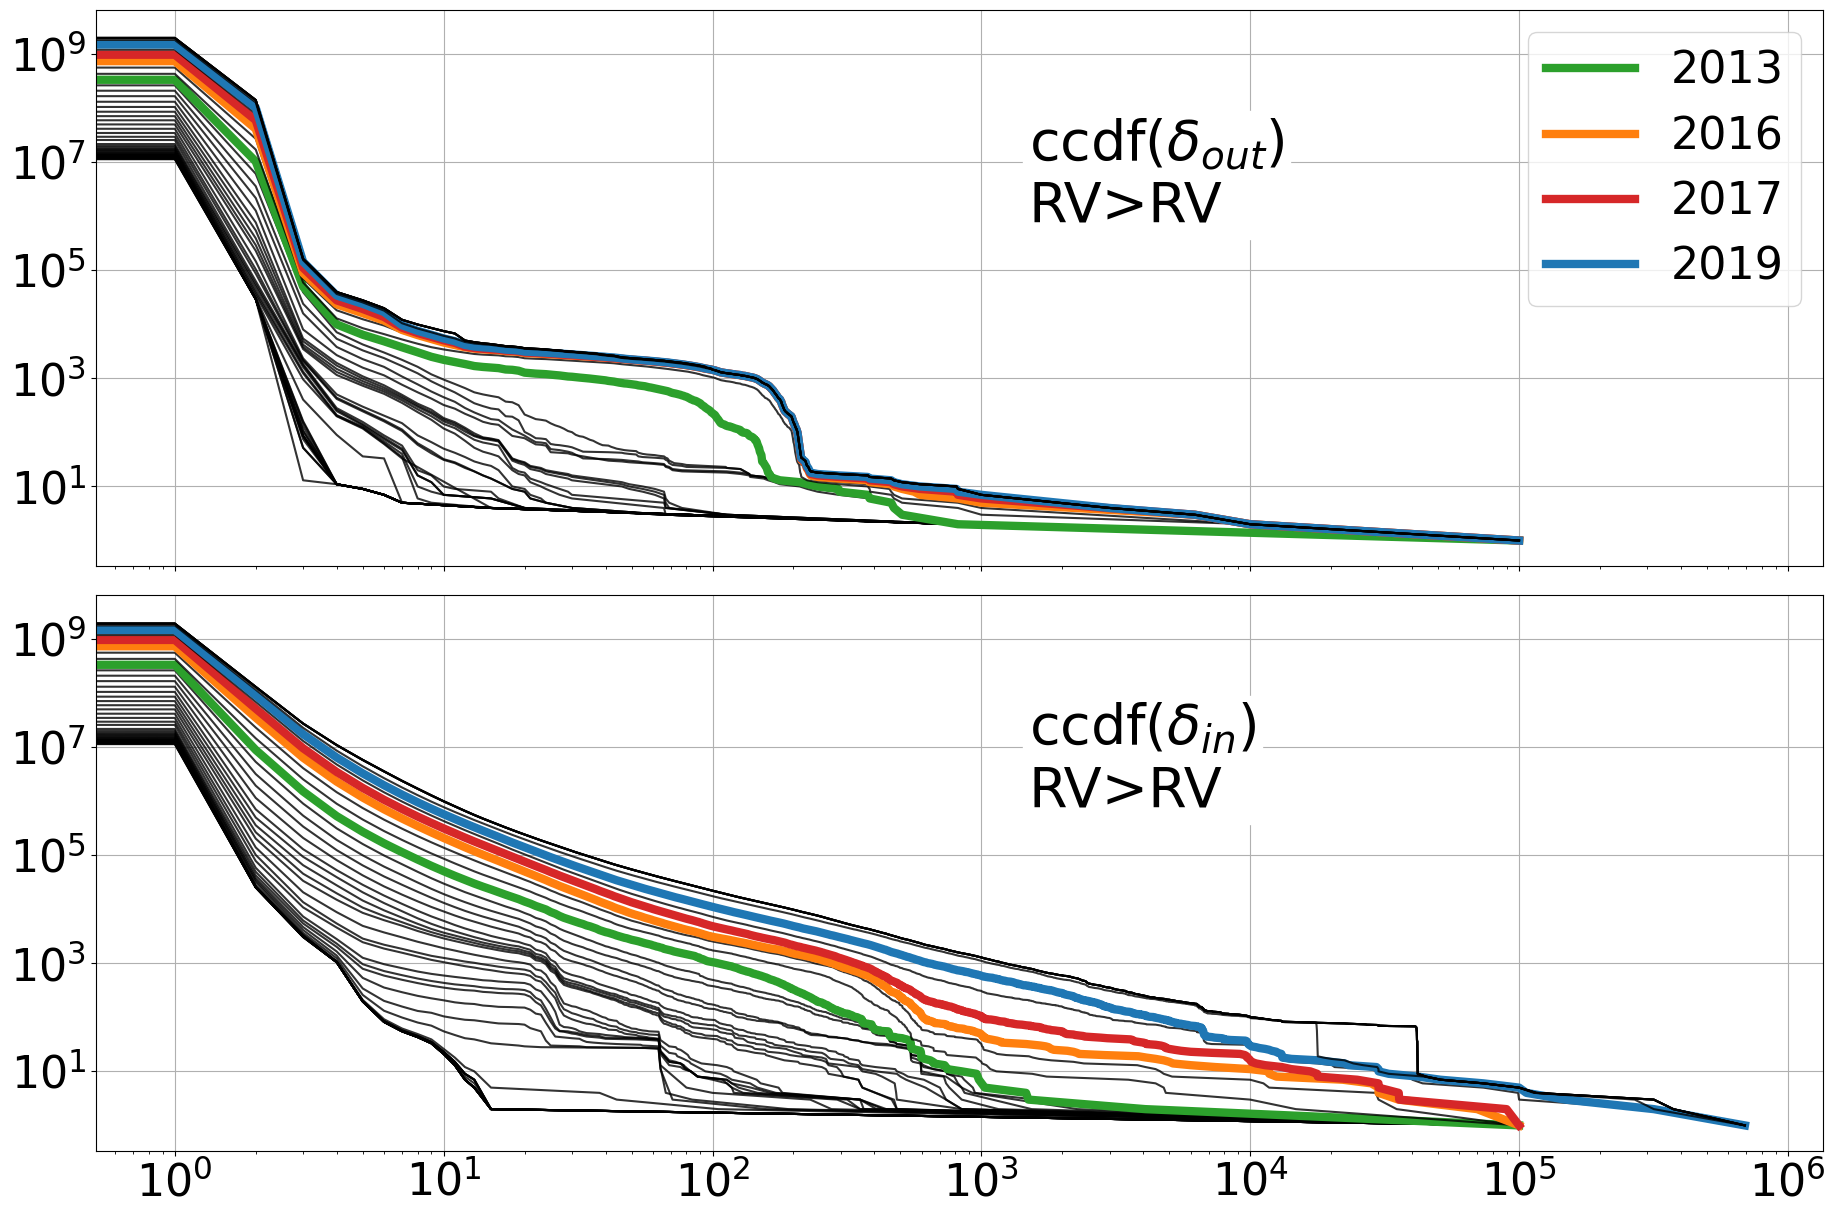

In [54]:
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))
# ccdf or df

if True:
    field,key=('ccdf',"ccdf")
else:
    field,key=('y',"df")
    
ColorList=["tab:green","tab:orange","tab:red","tab:blue"]
nfig=2

    
fontsize=FontSize[nfig]


fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
plt.tight_layout()
for s in ['RV>RV']:
    plt.tight_layout()
    for i in [0,1]:
        axs[i].grid()
        axs[i].set_yscale("log")
        axs[i].set_xscale("log")
        axs[i].tick_params(axis='both',which='major',labelsize=FontSize[nfig])

    for year in dout[s].keys():
        if year in yearlist:
            c=ColorList[np.where(np.array(yearlist)==year)[0][0]]
        
            axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c=c,lw=6,label=str(year))
            axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c=c,lw=6,label=str(year))

        else:
            axs[0].plot(dout[s][year]["x"],dout[s][year][key],markersize=0.5,c="k",alpha=0.8)
            axs[1].plot(din[s][year]["x"],din[s][year][key],markersize=0.5,c="k",alpha=0.8)
    axs[1].text(1.5e3,8e5,r'ccdf$(\delta_{in})$'+'\nRV>RV',fontdict={"fontsize":fontsize+8,'backgroundcolor':'w'})
    axs[0].text(1.5e3,8e5,r'ccdf$(\delta_{out})$'+'\nRV>RV',fontdict={"fontsize":fontsize+8,'backgroundcolor':'w'})
    axs[0].legend(loc='upper right',fontsize=fontsize,ncol=1,markerscale=2)
    plt.show()


### Scaling factor analysis (2013,2016,2017,2019)

Edge Timestamp : TrueTime
----------------------------------------------------------------------------------------------------
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 2013 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


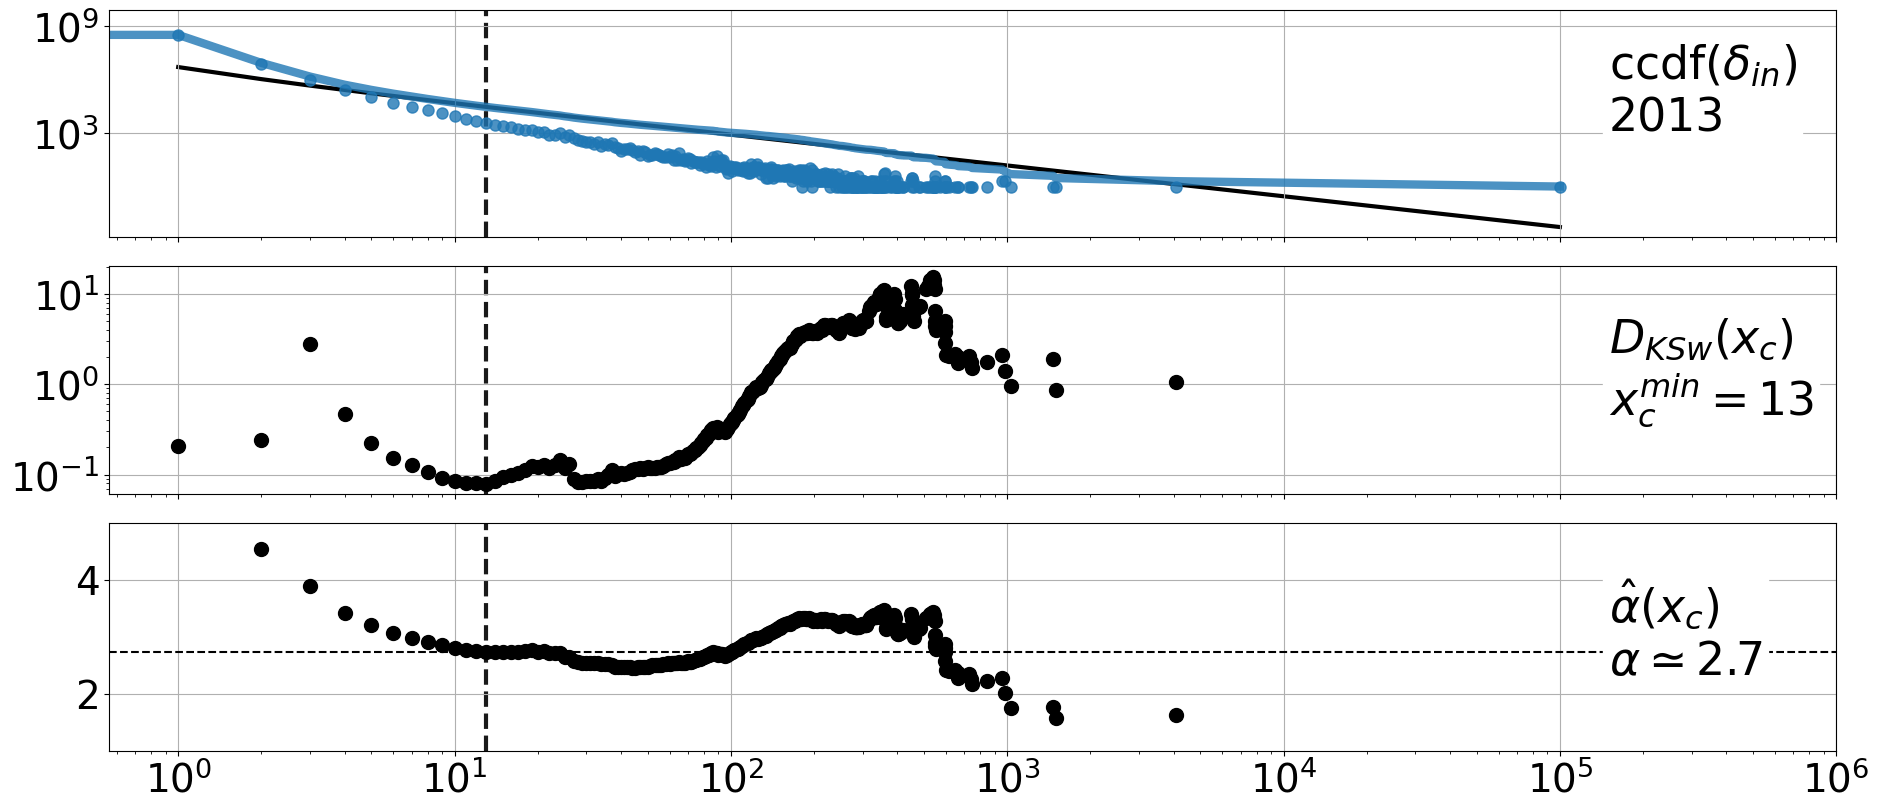

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 2016 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


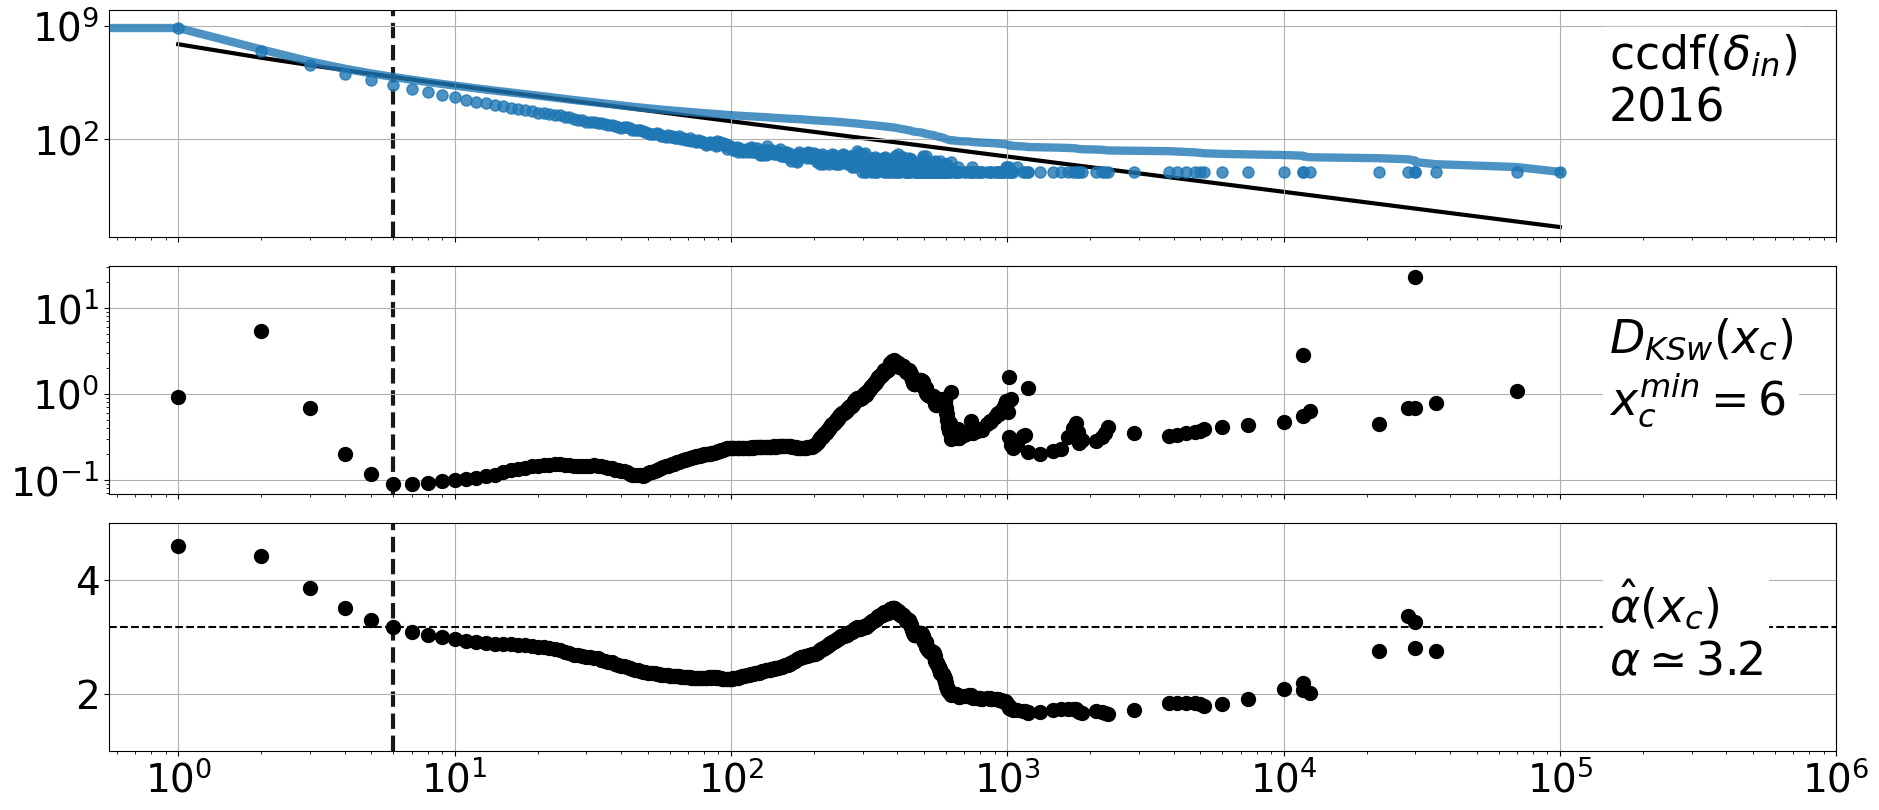

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 2017 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


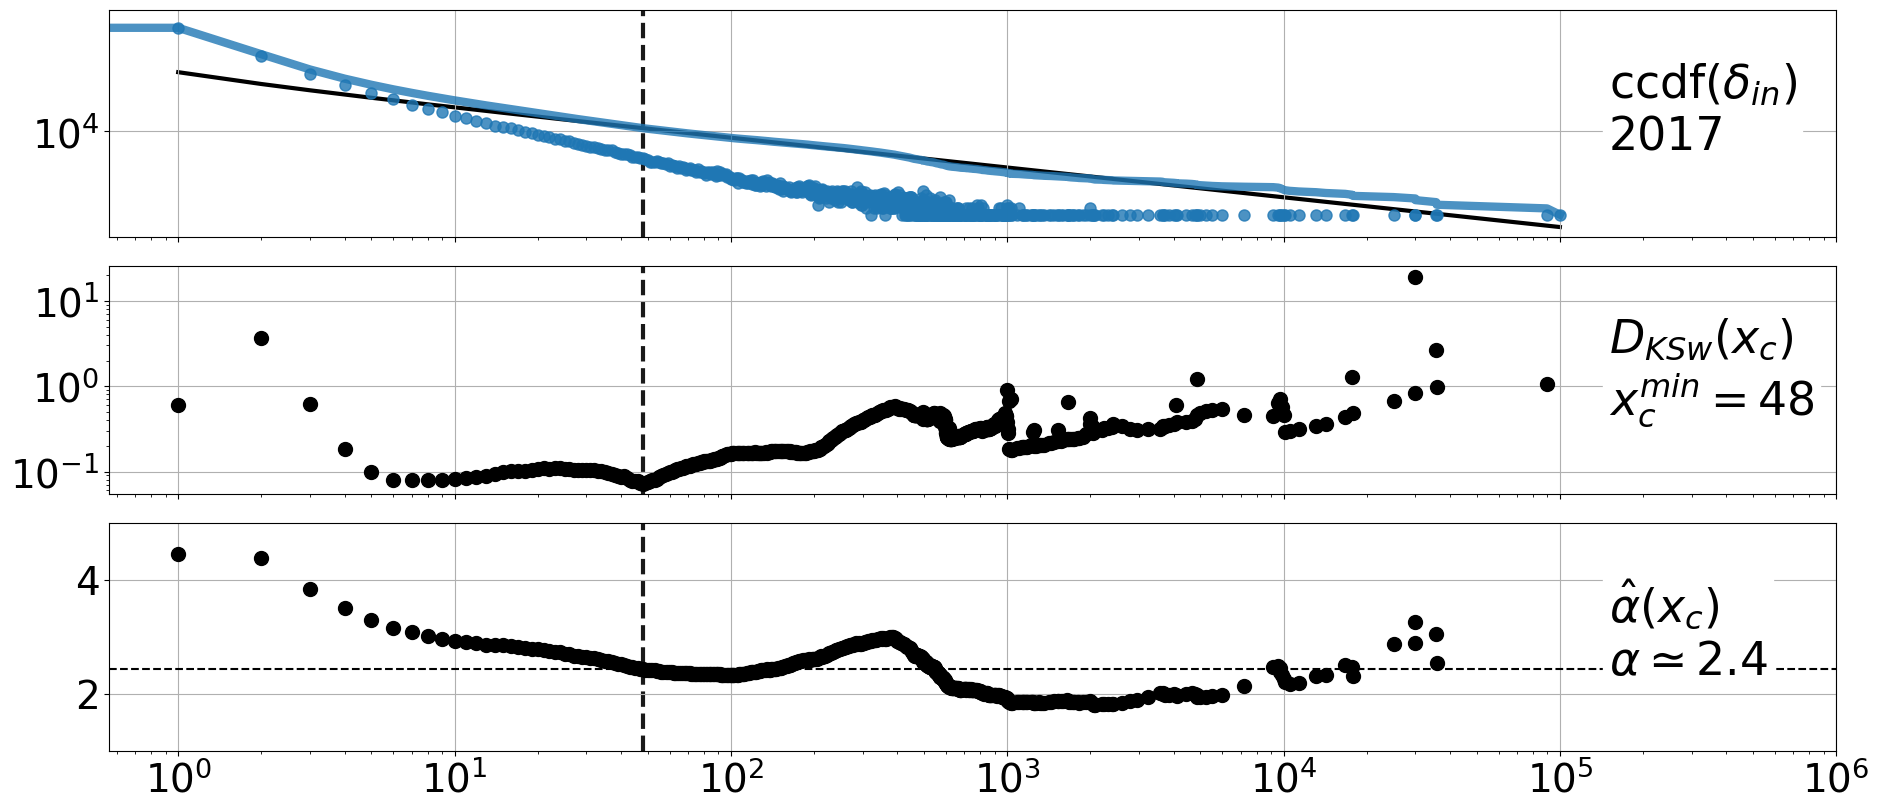

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 2019 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


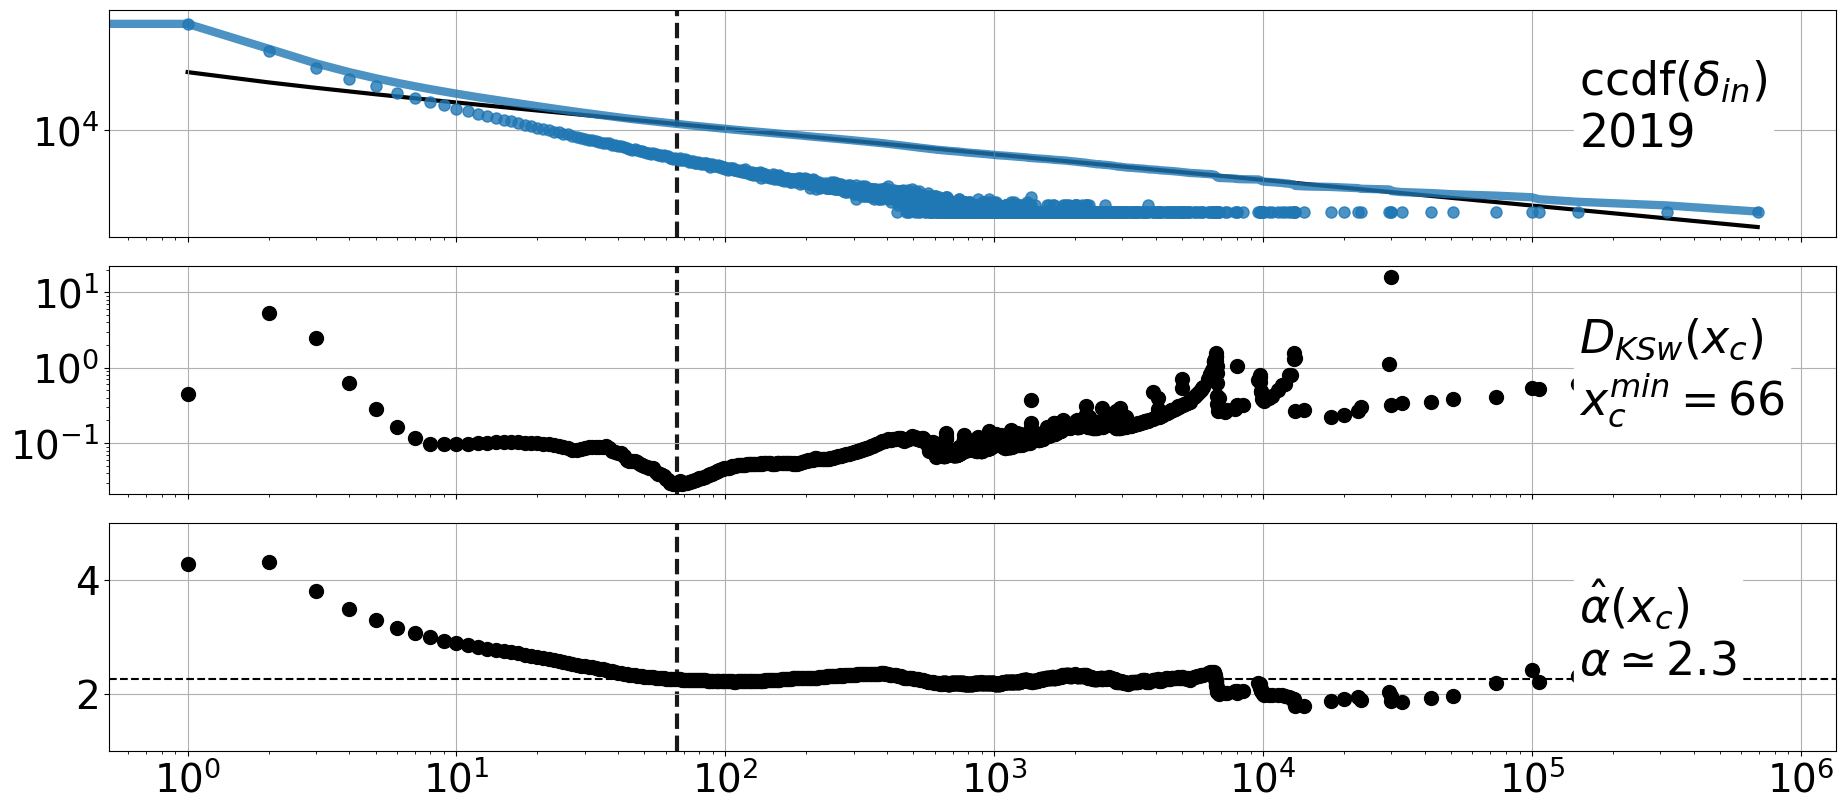

----------------------------------------------------------------------------------------------------


In [55]:
if FTrueTime:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_TT_year_1980_2025_20240924.pkl","rb"))
    print("Edge Timestamp : TrueTime")
else:
    dout,din=pickle.load(open(exportpath+"degreeInOutHisto_year_1980_2025_20240924.pkl","rb"))
    print("Edge Timestamp : Source Node Timestamp")

WKS="weightedKS"
XCmin=6

for year in yearlist:
    print("-"*100)
    print("X"*47,year,"X"*47)
    x=din["RV>RV"][year]["x"]
    y=din["RV>RV"][year]["y"]
    ccdf=din["RV>RV"][year]["ccdf"]

    Plot_Figure_Degree(x,y,ccdf,year=year,
                       filename='ehat_indegree_TT_RVRV_'+str(year)+'_',
                       height=4,yrangeAlpha=[1,5],
                       WKS="weightedKS",XCmin=XCmin)
    print("-"*100)



### Discussion

The observed discontinuity corresponds to a shift between two local minima of 
$D_{KS}$: one pre-existing, and another emerging at higher degree values, 
where an excess of nodes is visible in the $ccdf$ due to the accumulation 
of occurrences in the tail of the distribution (for in-degrees between 100 and 1000).

For the years 2013 and 2016, this shift is clearly associated with an increase in 
both $D_{KS}$ and $\hat{\alpha}$ around $x_c \simeq 400$. The effect remains 
visible in 2017, but nearly vanishes by 2019.

This phenomenon is particularly difficult to detect in the $PDF$, 
as it occurs in the region $\delta_{in}>100$, where finite-size effects induce 
large fluctuations in observed frequencies — with some values showing zero 
frequency due to the absence of observed occurrences.

Using the temporal representation of degree distributions introduced earlier, 
it can also be observed that such localized anomalies gradually lose influence 
over time, as their contribution becomes negligible within the in-degree distribution. 
This contrasts with the out-degree distribution, where they remain clearly 
detectable in the subsequent temporal analysis of in/out degree distributions.
